# Salary Data Set

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('salaries.csv')

In [3]:
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [4]:
inputs=df.drop('salary_more_then_100k',axis='columns')
target=df['salary_more_then_100k']

In [5]:
inputs.head()

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


In [6]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le_job = LabelEncoder()
le_company = LabelEncoder()
le_degree = LabelEncoder()

In [9]:
inputs['company_new'] = le_company.fit_transform(inputs['company'])


In [10]:
inputs['job_new'] = le_job.fit_transform(inputs['job'])
inputs['degree_new'] = le_company.fit_transform(inputs['degree'])

In [11]:
inputs.head()

,company,job,degree,company_new,job_new,degree_new
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [12]:
inputs=inputs.drop(['company','job','degree'],axis='columns')
inputs

,company_new,job_new,degree_new
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [13]:
from sklearn import tree

In [14]:
model = tree.DecisionTreeClassifier()

In [15]:
model.fit(inputs,target)

DecisionTreeClassifier()

In [16]:
model.score(inputs,target)

1.0

In [17]:
model.predict([[2,2,1]]) #google,sales executive,masters

array([0], dtype=int64)

# IRIS DATASET

In [18]:
import pandas as pd
import numpy as np
from sklearn import datasets


In [19]:
FEATURE_NAMES = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

iris = datasets.load_iris()

In [20]:
X = pd.DataFrame(iris.data, columns = FEATURE_NAMES)
y = iris.target


In [21]:
X

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [22]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

In [24]:
from sklearn.tree import export_graphviz

In [25]:
export_graphviz(model, 'tree.dot', feature_names = FEATURE_NAMES)

In [26]:

! dot -Tpng tree.dot -o tree.png

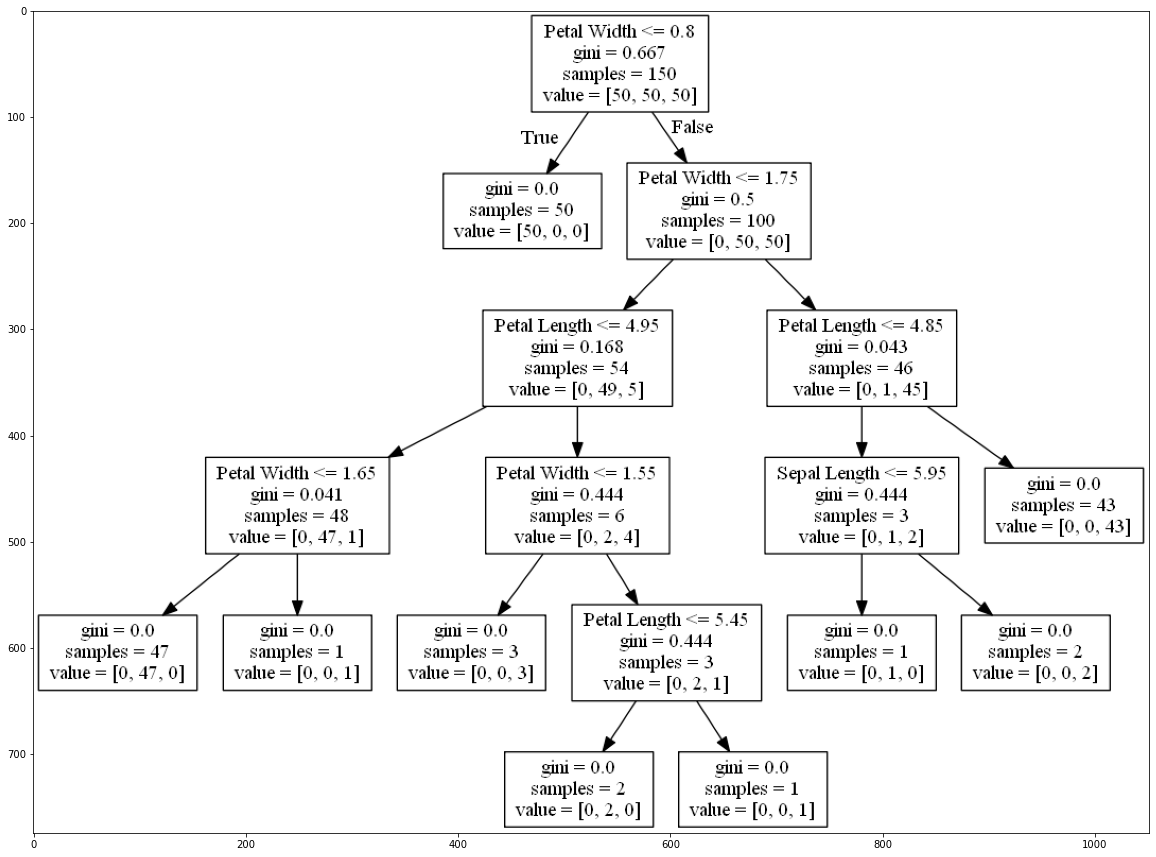

In [27]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)

# Titanic Data Set